In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('asset-v1_Kodlasam+VB-02+07.05.2023+type@asset+block@flights_weather2022.csv')

In [3]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,NaN,1155,NaN,NaN,2033,NaN,UA,...,SEA-EWR,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0
111002,2022,6,30,NaN,1448,NaN,NaN,1732,NaN,DL,...,SEA-LAX,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0
111003,2022,6,30,NaN,1751,NaN,NaN,2352,NaN,DL,...,SEA-ORD,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0
111004,2022,6,30,NaN,1145,NaN,NaN,2029,NaN,DL,...,SEA-JFK,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0


In [4]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

In [5]:
df = pd.DataFrame(df)

# Başlıkları Türkçeleştirelim
new_columns = ['yıl', 'ay', 'gün', 'kalkış_zamanı', 'pln_kalkış_zamanı', 'kalkış_gecikmesi',
               'varış_zamanı', 'pln_varış_zamanı', 'varış_gecikmesi', 'taşıyıcı', 'uçuş', 'kuyruk_no',
               'kalkış_yeri', 'varış_yeri', 'hava_sür', 'mesafe', 'saat', 'dakika', 'havayolu', 'rota',
               'sıcaklık', 'çimlenme_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_şiddeti',
               'yağış', 'basınç', 'görüş']

df.columns = new_columns

# Başlıkları kontrol edelim
df.head(10)

,yıl,ay,gün,kalkış_zamanı,pln_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,pln_varış_zamanı,varış_gecikmesi,taşıyıcı,...,rota,sıcaklık,çimlenme_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,...,PDX-JFK,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,...,SEA-MIA,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,...,SEA-PSC,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,...,SEA-IAD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


In [6]:
## veri setini tanıyalım.
def data_info (df):
    print('---BOYUT---')
    print(df.shape)
    print()
    
    print('---VERİ TİPLERİ---')
    print(df.info())
    print()
    
    print('---BOŞ DEĞERLER---')
    print(df.isnull().sum())
    print()
    
    print('---TEKİL DEĞERLER---')
    print(df.nunique())
    print()
    

In [7]:
data_info(df)

---BOYUT---
(111006, 29)

---VERİ TİPLERİ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   yıl                111006 non-null  int64  
 1   ay                 111006 non-null  int64  
 2   gün                111006 non-null  int64  
 3   kalkış_zamanı      108566 non-null  float64
 4   pln_kalkış_zamanı  111006 non-null  int64  
 5   kalkış_gecikmesi   108566 non-null  float64
 6   varış_zamanı       108469 non-null  float64
 7   pln_varış_zamanı   111006 non-null  int64  
 8   varış_gecikmesi    108332 non-null  float64
 9   taşıyıcı           111006 non-null  object 
 10  uçuş               111006 non-null  int64  
 11  kuyruk_no          110877 non-null  object 
 12  kalkış_yeri        111006 non-null  object 
 13  varış_yeri         111006 non-null  object 
 14  hava_sür           108332 non-null  float64
 15  mesafe

In [8]:
## her sütun için value_countslara ve top. unique veri sayısına bakalım.

for column in df.columns:
    value_counts = df[column].value_counts()
    unique_value_counts=df[column].nunique()
    print(f"{column} sütununda {unique_value_counts} farklı değer var.")
    print(value_counts)
    print("---")


yıl sütununda 1 farklı değer var.
yıl
2022    111006
Name: count, dtype: int64
---
ay sütununda 6 farklı değer var.
ay
6    20491
5    19971
4    18741
3    18306
1    17473
2    16024
Name: count, dtype: int64
---
gün sütununda 31 farklı değer var.
gün
24    3860
27    3831
17    3811
20    3788
21    3774
28    3770
6     3765
13    3741
7     3737
14    3732
25    3728
23    3726
10    3704
3     3691
11    3678
18    3672
22    3660
26    3639
19    3626
9     3616
8     3593
16    3593
12    3581
2     3575
4     3563
15    3556
1     3507
5     3411
30    3150
29    3059
31    1869
Name: count, dtype: int64
---
kalkış_zamanı sütununda 1316 farklı değer var.
kalkış_zamanı
556.0    282
558.0    272
755.0    266
756.0    264
557.0    254
        ... 
245.0      1
347.0      1
315.0      1
358.0      1
223.0      1
Name: count, Length: 1316, dtype: int64
---
pln_kalkış_zamanı sütununda 885 farklı değer var.
pln_kalkış_zamanı
600     2744
800     1969
700     1674
950     1602
1535   

In [9]:
## Veri Özeti
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yıl,111006.0,2022.000000,0.000000,2022.00,2022.000000,2022.000000,2022.000000,2022.000000
ay,111006.0,3.623264,1.713287,1.00,2.000000,4.000000,5.000000,6.000000
gün,111006.0,15.736654,8.723487,1.00,8.000000,16.000000,23.000000,31.000000
kalkış_zamanı,108566.0,1336.449487,540.664793,1.00,912.000000,1309.000000,1800.000000,2400.000000
pln_kalkış_zamanı,111006.0,1342.068158,530.610560,2.00,910.000000,1305.000000,1800.000000,2359.000000
kalkış_gecikmesi,108566.0,8.038456,41.687738,-36.00,-5.000000,-2.000000,6.000000,2120.000000
varış_zamanı,108469.0,1467.243636,570.938019,1.00,1055.000000,1520.000000,1917.000000,2400.000000
pln_varış_zamanı,111006.0,1506.330090,546.796862,3.00,1115.000000,1540.000000,1937.000000,2359.000000
varış_gecikmesi,108332.0,2.359524,43.088734,-65.00,-14.000000,-5.000000,6.000000,2098.000000
uçuş,111006.0,433.663856,267.779635,1.00,210.000000,416.000000,644.000000,1100.000000


## Tarih Dönüşümlerini Yapalım

In [10]:
# 'tarih' adında yeni bir sütun oluşturalım ve 'yıl', 'ay' ve 'gün' sütunlarını birleştirerek tarih formatında saklayalım
df['tarih'] = pd.to_datetime(df['yıl']*10000 + df['ay']*100 + df['gün'], format='%Y%m%d')

# DataFrame'i gösterelim
df.head()

,yıl,ay,gün,kalkış_zamanı,pln_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,pln_varış_zamanı,varış_gecikmesi,taşıyıcı,...,sıcaklık,çimlenme_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş,tarih
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01


In [11]:
#Pln_kalkış_zamanı sütununu "saat:dakika" biçiminde düzenleyelim.
df['pln_kalkış_zamanı'] = df['saat'].astype(str) + ':' + df['dakika'].astype(str)
df.head()

,yıl,ay,gün,kalkış_zamanı,pln_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,pln_varış_zamanı,varış_gecikmesi,taşıyıcı,...,sıcaklık,çimlenme_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş,tarih
0,2022,1,1,1.0,23:59,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
1,2022,1,1,1.0,22:50,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01
2,2022,1,1,10.0,23:55,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
3,2022,1,1,25.0,23:50,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
4,2022,1,1,35.0,23:49,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01


In [12]:
#'kalkış_zamanı', 'varış_zamanı', sütunlarını düzenleyelim.
# 'kalkış_zamanı', 'varış_zamanı', sütunlarındaki noktaları atalım
sütunlar = ['kalkış_zamanı', 'varış_zamanı',]

# NaN değerlerini sıfır ile dolduralım
df[sütunlar] = df[sütunlar].fillna(0)

# '.'dan sonraki değerleri kaldıralım
for sütun in sütunlar:
    df[sütun] = df[sütun].astype(str).str.split('.').str[0]

# Sonuçları görelim
print(df[sütunlar].head())

  kalkış_zamanı varış_zamanı
0             1          604
1             1          242
2            10          759
3            25          606
4            35          616


In [13]:
#kalkış_zamanı ve varış_zamanı dört haneli hale getirelim sonra 00:00 şeklinde gösterelim

# Sütunu istenen formata dönüştürme

df['kalkış_zamanı'] = df['kalkış_zamanı'].apply(lambda x: x.zfill(4))
df['kalkış_zamanı'] = df['kalkış_zamanı'].apply(lambda x: x[:2] + ':' + x[2:])

df['varış_zamanı'] = df['varış_zamanı'].apply(lambda x: x.zfill(4))
df['varış_zamanı'] = df['varış_zamanı'].apply(lambda x: x[:2] + ':' + x[2:])

# Sonuçları kontrol edelim.
print(df[sütunlar].head())

  kalkış_zamanı varış_zamanı
0         00:01        06:04
1         00:01        02:42
2         00:10        07:59
3         00:25        06:06
4         00:35        06:16


In [14]:
## pln_varış_zamanı nı da 00:00 formatına çevirelim.

df['pln_varış_zamanı'] = df['pln_varış_zamanı'].astype(str).apply(lambda x: x.zfill(4))
df['pln_varış_zamanı'] = df['pln_varış_zamanı'].apply(lambda x: x[:2] + ':' + x[2:])

# Sonuçları kontrol edelim.
print(df['pln_varış_zamanı'].head())

0    06:18
1    01:42
2    07:30
3    05:50
4    05:45
Name: pln_varış_zamanı, dtype: object


In [15]:
df[['kalkış_zamanı','pln_kalkış_zamanı','kalkış_gecikmesi','varış_zamanı','pln_varış_zamanı','varış_gecikmesi']].head()

,kalkış_zamanı,pln_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,pln_varış_zamanı,varış_gecikmesi
0,00:01,23:59,2.0,06:04,06:18,-14.0
1,00:01,22:50,71.0,02:42,01:42,60.0
2,00:10,23:55,15.0,07:59,07:30,29.0
3,00:25,23:50,35.0,06:06,05:50,16.0
4,00:35,23:49,46.0,06:16,05:45,31.0


In [16]:
df2=df.copy()

## HAVA DURUMU DEĞİŞKENLERİ İLE, DELAY ARASINDA MANTIKLI BİR PARAMETRE VAR MI?

In [17]:
hava_durumu_degiskenleri = df[['kalkış_gecikmesi','varış_gecikmesi', 'sıcaklık', 'çimlenme_noktası', 'nem', 
                                    'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_şiddeti', 'yağış', 
                                    'basınç', 'görüş']]

hava_durumu_degiskenleri.head()

,kalkış_gecikmesi,varış_gecikmesi,sıcaklık,çimlenme_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş
0,2.0,-14.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,71.0,60.0,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,15.0,29.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,35.0,16.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,46.0,31.0,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


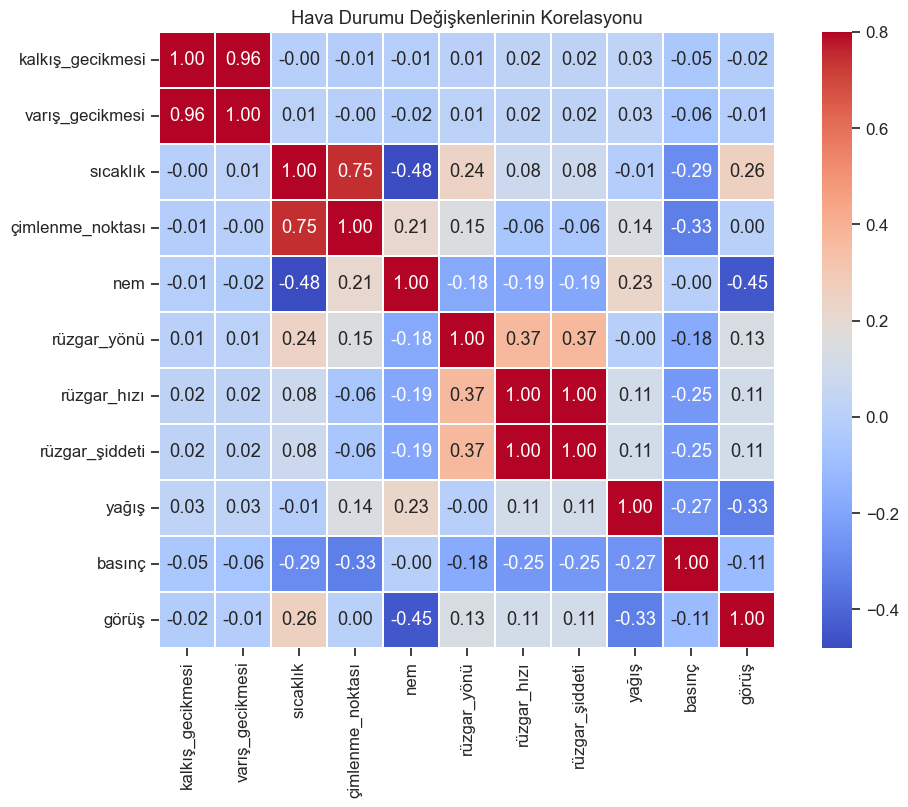

In [18]:
## hava durumu değişkenleri için korelasyona bakalım

corr = hava_durumu_degiskenleri.corr()

sns.set(font_scale=1.10,style="ticks")
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=.8, linewidths=0.05, fmt=".2f",
            square=True, annot=True, cmap='coolwarm', linecolor="white")

plt.title('Hava Durumu Değişkenlerinin Korelasyonu')
plt.show()

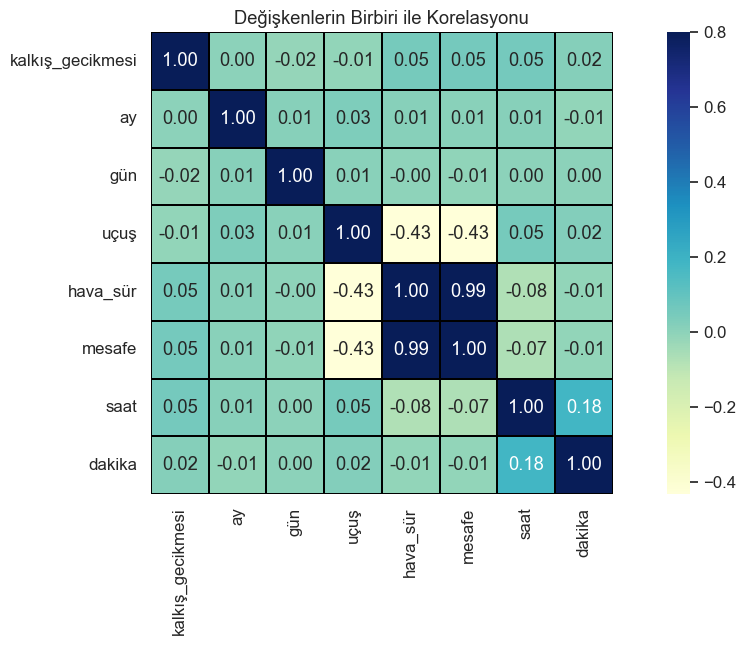

In [19]:
#Kalkış_gecikmesinin tüm sayısal değişkenlerle korelasyonunu da merak ettim. 
#Sayısal verileri alalım.
numeric_df = df[['kalkış_gecikmesi','ay', 'gün','uçuş','hava_sür', 'mesafe', 'saat', 'dakika']]
corr = numeric_df.corr()

#Grafiği görelim.
sns.set(font_scale=1.10)
plt.figure(figsize=(14,6))
sns.heatmap(corr, vmax=.8, linewidths=0.01, fmt=".2f",
            square=True, annot=True, cmap='YlGnBu', linecolor="black")

plt.title('Değişkenlerin Birbiri ile Korelasyonu');

##  Gecikmeler açısından hangi havayolları en kötü/ en iyi performansı gösteriyor?

In [20]:
df_havayolu=df[['havayolu','taşıyıcı','kalkış_gecikmesi','varış_gecikmesi']]
df_havayolu

,havayolu,taşıyıcı,kalkış_gecikmesi,varış_gecikmesi
0,United Air Lines Inc.,UA,2.0,-14.0
1,Alaska Airlines Inc.,AS,71.0,60.0
2,Alaska Airlines Inc.,AS,15.0,29.0
3,Alaska Airlines Inc.,AS,35.0,16.0
4,United Air Lines Inc.,UA,46.0,31.0
...,...,...,...,...
111001,United Air Lines Inc.,UA,NaN,NaN
111002,Delta Air Lines Inc.,DL,NaN,NaN
111003,Delta Air Lines Inc.,DL,NaN,NaN
111004,Delta Air Lines Inc.,DL,NaN,NaN


In [21]:
df_havayolu.groupby('havayolu')['kalkış_gecikmesi'].mean().reset_index().sort_values(by='kalkış_gecikmesi', ascending=False)

,havayolu,kalkış_gecikmesi
7,JetBlue Airways,42.110937
1,Allegiant Air,26.769231
2,American Airlines Inc.,20.181184
4,Frontier Airlines Inc.,14.253394
9,Southwest Airlines Co.,11.341302
10,Spirit Air Lines,10.841270
3,Delta Air Lines Inc.,10.635924
5,Hawaiian Airlines Inc.,8.241331
11,United Air Lines Inc.,7.087027
0,Alaska Airlines Inc.,6.749944


## Uçuş performansı yılın aylarına göre değişiyor mu? Bir havayolu şirketi her zaman en kötü performansı gösteren havayolu mudur, yoksa değişkenlik var mıdır?

In [22]:
#  Aylara göre bakmak için Pivot tablo oluşturalım.
pivot_df = df.pivot_table(index='ay', columns='havayolu', values='kalkış_gecikmesi', aggfunc='mean')

print(pivot_df)

havayolu  Alaska Airlines Inc.  Allegiant Air  American Airlines Inc.  \
ay                                                                      
1                     8.855350      11.875000               19.531579   
2                     4.583453       7.142857               15.046460   
3                     5.165944       2.000000                8.405128   
4                    10.201096      16.000000               29.288815   
5                     5.812827      37.481481               16.454962   
6                     6.002589      38.807692               29.287101   

havayolu  Delta Air Lines Inc.  Frontier Airlines Inc.  \
ay                                                       
1                    10.601489               18.136986   
2                     6.255211               10.652174   
3                    10.564697               11.450000   
4                    11.186801               17.822581   
5                    10.724536               17.285714   
6        

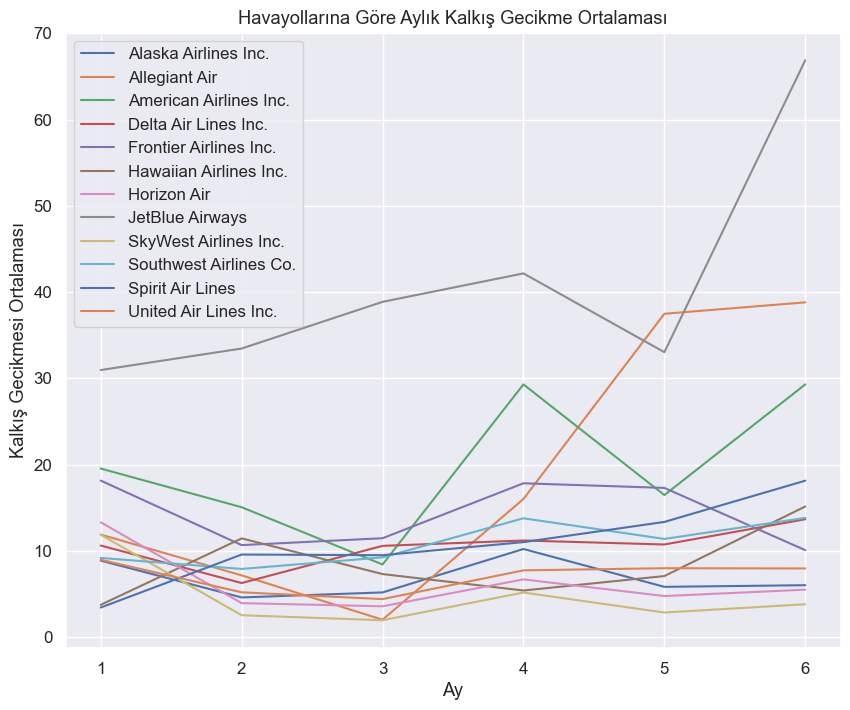

In [23]:
havayolları = pivot_df.columns.tolist()

# Çizgi grafiği oluşturalım.
plt.figure(figsize=(10, 8))

for havayolu in havayolları:
    plt.plot(pivot_df.index, pivot_df[havayolu], label=havayolu)


plt.xlabel('Ay')
plt.ylabel('Kalkış Gecikmesi Ortalaması')
plt.title('Havayollarına Göre Aylık Kalkış Gecikme Ortalaması')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [24]:
# Her bir indeks için maksimum değere sahip olan sütunları bulma
max_sutunlar = pivot_df.idxmax(axis=1)

print("\nHer Bir Indeks için Maksimum Değere Sahip Sütunlar:")
print(max_sutunlar)



Her Bir Indeks için Maksimum Değere Sahip Sütunlar:
ay
1    JetBlue Airways
2    JetBlue Airways
3    JetBlue Airways
4    JetBlue Airways
5      Allegiant Air
6    JetBlue Airways
dtype: object


In [25]:
#JetBlue Airways(ort=42) özelinde aylara göre kırılımı incelediğimizde:
pivot_df['JetBlue Airways']

ay
1    30.955056
2    33.450549
3    38.863636
4    42.163462
5    33.025641
6    66.883721
Name: JetBlue Airways, dtype: float64

## Gecikme sürelerini cut veya qcut fonksiyonları ile 5 parçaya bölerek kategorik bir değişken oluşturunuz. Örneğin: En az gecikme 1. Seviye, en çok gecikme 5. seviye olmak üzere 

In [26]:
# Gecikme sürelerini 5 parçaya bölerek kategorik bir değişken oluşturalım. 
df['gecikme_seviyeleri'] = pd.cut(df['kalkış_gecikmesi'], bins=5, labels=['1.seviye', '2.seviye', '3.seviye', '4.seviye', '5.seviye',])
df['gecikme_seviyeleri'] = df['gecikme_seviyeleri'].astype('category')

In [27]:
df[['kalkış_gecikmesi','gecikme_seviyeleri']].head()

,kalkış_gecikmesi,gecikme_seviyeleri
0,2.0,1.seviye
1,71.0,1.seviye
2,15.0,1.seviye
3,35.0,1.seviye
4,46.0,1.seviye


In [28]:
df['gecikme_seviyeleri'].value_counts().reset_index()

,gecikme_seviyeleri,count
0,1.seviye,108422
1,2.seviye,90
2,3.seviye,42
3,4.seviye,8
4,5.seviye,4


In [29]:
df['gecikme_seviyeleri'].isnull().sum()

2440

In [30]:
## Gecikme sürelerine iptal adında kategori ekleyelim ve boş değerleri 'iptal' olarak dolduralım.

df['gecikme_seviyeleri'] = df['gecikme_seviyeleri'].cat.add_categories('iptal')


df['gecikme_seviyeleri'] = df['gecikme_seviyeleri'].fillna('iptal')


In [31]:
df['gecikme_seviyeleri'].value_counts().reset_index().sort_values(by='count', ascending=False)

,gecikme_seviyeleri,count
0,1.seviye,108422
1,iptal,2440
2,2.seviye,90
3,3.seviye,42
4,4.seviye,8
5,5.seviye,4


In [32]:
## her seviye için ortlama gecikme süresini ve toplam veri sayısını gösterelim.
ort_toplam = df.groupby('gecikme_seviyeleri').agg({'kalkış_gecikmesi': 'mean', 'gecikme_seviyeleri': 'count' })


ort_toplam

,kalkış_gecikmesi,gecikme_seviyeleri
gecikme_seviyeleri,,
1.seviye,7.007720,108422
2.seviye,586.533333,90
3.seviye,980.380952,42
4.seviye,1401.000000,8
5.seviye,1935.000000,4
iptal,NaN,2440


In [33]:
# 5. seviyedeki verileri kontrol edelim
df[['kalkış_gecikmesi','gecikme_seviyeleri']][df['gecikme_seviyeleri']=='5.seviye']

,kalkış_gecikmesi,gecikme_seviyeleri
10130,2120.0,5.seviye
38318,1872.0,5.seviye
52353,1930.0,5.seviye
59438,1818.0,5.seviye


In [34]:
# 1. seviyedeki verileri kontrol edelim
df[['kalkış_gecikmesi','gecikme_seviyeleri']][df['gecikme_seviyeleri']=='1.seviye'].sort_values(by='kalkış_gecikmesi', ascending=False)

,kalkış_gecikmesi,gecikme_seviyeleri
99680,395.0,1.seviye
62585,395.0,1.seviye
70296,395.0,1.seviye
36580,393.0,1.seviye
8395,392.0,1.seviye
...,...,...
104438,-24.0,1.seviye
6895,-24.0,1.seviye
43734,-26.0,1.seviye
8061,-36.0,1.seviye


## Hangi rotaların 1. seviye gecikme sınıfına girme olasılığı en yüksek? 

In [35]:
##kullandığım 1. yöntem

In [36]:
df_1_seviye=df[['rota','gecikme_seviyeleri']][df['gecikme_seviyeleri']=='1.seviye']
df_1_seviye

,rota,gecikme_seviyeleri
0,SEA-IAH,1.seviye
1,SEA-FAI,1.seviye
2,SEA-ATL,1.seviye
3,SEA-ORD,1.seviye
4,PDX-ORD,1.seviye
...,...,...
110996,PDX-PHX,1.seviye
110997,SEA-ORD,1.seviye
110998,PDX-ATL,1.seviye
110999,PDX-IAH,1.seviye


In [37]:
df_1_seviye['rota'].value_counts().reset_index()

,rota,count
0,SEA-PDX,3795
1,PDX-SEA,3759
2,SEA-ANC,3284
3,SEA-LAX,3222
4,SEA-SFO,3178
...,...,...
144,SEA-CLE,14
145,PDX-BZN,14
146,PDX-DAL,10
147,PDX-STL,6


In [38]:
#şu şekilde de yapılabilir
rota_gecikme_sayisi = df.groupby(['rota', 'gecikme_seviyeleri']).size().unstack()
rota_gecikme_sayisi

gecikme_seviyeleri,1.seviye,2.seviye,3.seviye,4.seviye,5.seviye,iptal
rota,,,,,,
PDX-ABQ,151,0,0,0,0,2
PDX-ANC,232,0,0,0,0,3
PDX-ATL,563,1,1,0,0,13
PDX-AUS,146,0,0,0,0,5
PDX-BOI,683,0,0,0,0,7
...,...,...,...,...,...,...
SEA-STS,377,0,0,0,0,5
SEA-SUN,121,0,0,0,0,5
SEA-TPA,482,0,0,0,0,20


In [39]:
rota_gecikme_sayisi['1.seviye'].reset_index().sort_values(by='1.seviye',ascending=False)

,rota,1.seviye
121,SEA-PDX,3795
46,PDX-SEA,3759
58,SEA-ANC,3284
103,SEA-LAX,3222
137,SEA-SFO,3178
...,...,...
7,PDX-BZN,14
70,SEA-CLE,14
9,PDX-DAL,10
52,PDX-STL,6


## 6. Uçuş iptallerinin yüzde kaç olduğunu belirleyip havayoluna göre değişkenliğini gösteriniz? 

In [40]:
df

,yıl,ay,gün,kalkış_zamanı,pln_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,pln_varış_zamanı,varış_gecikmesi,taşıyıcı,...,çimlenme_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş,tarih,gecikme_seviyeleri
0,2022,1,1,00:01,23:59,2.0,06:04,06:18,-14.0,UA,...,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,1.seviye
1,2022,1,1,00:01,22:50,71.0,02:42,01:42,60.0,AS,...,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01,1.seviye
2,2022,1,1,00:10,23:55,15.0,07:59,07:30,29.0,AS,...,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,1.seviye
3,2022,1,1,00:25,23:50,35.0,06:06,05:50,16.0,AS,...,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,1.seviye
4,2022,1,1,00:35,23:49,46.0,06:16,05:45,31.0,UA,...,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01,1.seviye
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,00:00,11:55,NaN,00:00,20:33,NaN,UA,...,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,2022-06-30,iptal
111002,2022,6,30,00:00,14:48,NaN,00:00,17:32,NaN,DL,...,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0,2022-06-30,iptal
111003,2022,6,30,00:00,17:51,NaN,00:00,23:52,NaN,DL,...,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0,2022-06-30,iptal
111004,2022,6,30,00:00,11:45,NaN,00:00,20:29,NaN,DL,...,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,2022-06-30,iptal


In [41]:
# Havayolları uçuş sayıları 
ucus_sayisi = df['havayolu'].value_counts()
print(ucus_sayisi)

havayolu
Alaska Airlines Inc.      41697
Horizon Air               19727
Delta Air Lines Inc.      16516
SkyWest Airlines Inc.     13265
Southwest Airlines Co.     7044
United Air Lines Inc.      6285
American Airlines Inc.     3667
Spirit Air Lines            857
Hawaiian Airlines Inc.      725
JetBlue Airways             672
Frontier Airlines Inc.      454
Allegiant Air                97
Name: count, dtype: int64


In [42]:
# Veri setindeki boş değerlere baktığımızda (varış gecikmesi:2674, hava süresi: 2674) iptal olan uçuş sayısının 2674 olduğunu varsayacağım.

ipt_ucus = df['hava_sür'].isnull().sum()

print("İptal uçuş:", ipt_ucus)

İptal uçuş: 2674


In [43]:
#havayolu bazında iptal edilen uçuşlara bakalım

iptal_ucus_sayisi = df[df['hava_sür'].isnull()].groupby('havayolu').size()

print(iptal_ucus_sayisi)

havayolu
Alaska Airlines Inc.      1385
Allegiant Air                6
American Airlines Inc.      92
Delta Air Lines Inc.       403
Frontier Airlines Inc.      12
Hawaiian Airlines Inc.       5
Horizon Air                303
JetBlue Airways             35
SkyWest Airlines Inc.      183
Southwest Airlines Co.     107
Spirit Air Lines            38
United Air Lines Inc.      105
dtype: int64


In [44]:
#havayolu bazında toplam uçuşlara bakalım
toplam_ucus=df.groupby('havayolu').size()
toplam_ucus

havayolu
Alaska Airlines Inc.      41697
Allegiant Air                97
American Airlines Inc.     3667
Delta Air Lines Inc.      16516
Frontier Airlines Inc.      454
Hawaiian Airlines Inc.      725
Horizon Air               19727
JetBlue Airways             672
SkyWest Airlines Inc.     13265
Southwest Airlines Co.     7044
Spirit Air Lines            857
United Air Lines Inc.      6285
dtype: int64

In [45]:
## her havayolu için iptal yüzdesini gösterelim.

data = pd.concat([toplam_ucus, iptal_ucus_sayisi], axis=1)
data.columns = ['Toplam Ucus', 'İptal Ucus']

# İptal oranını hesaplaylım.
data['İptal Oranı'] = (data['İptal Ucus'] / data['Toplam Ucus']).round(3)

# Sonuçları görelim.
print(data.sort_values(by='İptal Oranı',ascending=False))

                        Toplam Ucus  İptal Ucus  İptal Oranı
havayolu                                                    
Allegiant Air                    97           6        0.062
JetBlue Airways                 672          35        0.052
Spirit Air Lines                857          38        0.044
Alaska Airlines Inc.          41697        1385        0.033
Frontier Airlines Inc.          454          12        0.026
American Airlines Inc.         3667          92        0.025
Delta Air Lines Inc.          16516         403        0.024
United Air Lines Inc.          6285         105        0.017
Horizon Air                   19727         303        0.015
Southwest Airlines Co.         7044         107        0.015
SkyWest Airlines Inc.         13265         183        0.014
Hawaiian Airlines Inc.          725           5        0.007


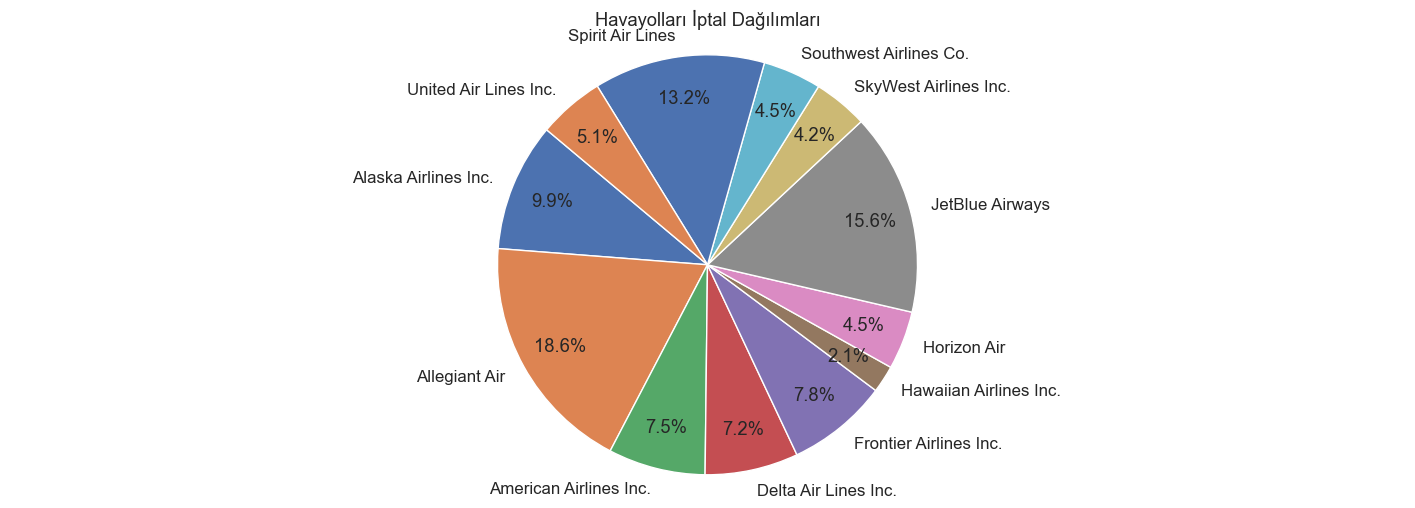

In [46]:
# Pasta grafiğini çizelim
plt.figure(figsize=(18, 6)) 
plt.pie(data['İptal Oranı'], labels=data.index, autopct='%1.1f%%', startangle=140, pctdistance=0.8)
plt.title('Havayolları İptal Dağılımları') 
plt.axis('equal')

plt.show()

# 1. Her havayolunun mesafeyle ilişkisini anlamak için kategorik bir değişken oluşturunuz.

In [88]:
## İPTAL UÇUŞLARI VERİ SETİNDEN ÇIKARTALIM

In [47]:
## iptal olan uçuşları veri setinden çıkaralım

## verisetinin bir kopyasını alalım.
df_all=df.copy()

In [48]:
## hava_süresinde nan değerler varken boş değerler
df.isnull().sum()

yıl                      0
ay                       0
gün                      0
kalkış_zamanı            0
pln_kalkış_zamanı        0
kalkış_gecikmesi      2440
varış_zamanı             0
pln_varış_zamanı         0
varış_gecikmesi       2674
taşıyıcı                 0
uçuş                     0
kuyruk_no              129
kalkış_yeri              0
varış_yeri               0
hava_sür              2674
mesafe                   0
saat                     0
dakika                   0
havayolu                 0
rota                     0
sıcaklık                 0
çimlenme_noktası         0
nem                      0
rüzgar_yönü           3163
rüzgar_hızı            279
rüzgar_şiddeti         279
yağış                    0
basınç                   0
görüş                    0
tarih                    0
gecikme_seviyeleri       0
dtype: int64

In [49]:
# air_time sütununda NaN değerlere sahip satırları filtreleme
cancelled_flights = df[df['hava_sür'].isna()]

print(cancelled_flights)

         yıl  ay  gün kalkış_zamanı pln_kalkış_zamanı  kalkış_gecikmesi  \
466     2022   1    1         22:55             21:25              90.0   
485     2022   1    1         00:00             18:45               NaN   
486     2022   1    1         00:00              9:45               NaN   
487     2022   1    1         00:00             13:27               NaN   
488     2022   1    1         00:00             17:15               NaN   
...      ...  ..  ...           ...               ...               ...   
111001  2022   6   30         00:00             11:55               NaN   
111002  2022   6   30         00:00             14:48               NaN   
111003  2022   6   30         00:00             17:51               NaN   
111004  2022   6   30         00:00             11:45               NaN   
111005  2022   6   30         00:00              7:20               NaN   

       varış_zamanı pln_varış_zamanı  varış_gecikmesi taşıyıcı  ...  \
466           00:00         

In [50]:
# NaN değerlere sahip satırları veri setinden kaldırma
df.dropna(subset=['hava_sür'], inplace=True)

df.head()

,yıl,ay,gün,kalkış_zamanı,pln_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,pln_varış_zamanı,varış_gecikmesi,taşıyıcı,...,çimlenme_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_şiddeti,yağış,basınç,görüş,tarih,gecikme_seviyeleri
0,2022,1,1,00:01,23:59,2.0,06:04,06:18,-14.0,UA,...,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,1.seviye
1,2022,1,1,00:01,22:50,71.0,02:42,01:42,60.0,AS,...,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01,1.seviye
2,2022,1,1,00:10,23:55,15.0,07:59,07:30,29.0,AS,...,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,1.seviye
3,2022,1,1,00:25,23:50,35.0,06:06,05:50,16.0,AS,...,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,1.seviye
4,2022,1,1,00:35,23:49,46.0,06:16,05:45,31.0,UA,...,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01,1.seviye


In [51]:
# hava_süresindeki nan değerleri kaldırdıktan sonra boş değerler 
df.isnull().sum()

yıl                      0
ay                       0
gün                      0
kalkış_zamanı            0
pln_kalkış_zamanı        0
kalkış_gecikmesi         0
varış_zamanı             0
pln_varış_zamanı         0
varış_gecikmesi          0
taşıyıcı                 0
uçuş                     0
kuyruk_no                0
kalkış_yeri              0
varış_yeri               0
hava_sür                 0
mesafe                   0
saat                     0
dakika                   0
havayolu                 0
rota                     0
sıcaklık                 0
çimlenme_noktası         0
nem                      0
rüzgar_yönü           3113
rüzgar_hızı            273
rüzgar_şiddeti         273
yağış                    0
basınç                   0
görüş                    0
tarih                    0
gecikme_seviyeleri       0
dtype: int64

### 2. Uçuş mesafeleri, 500 mil altındaki mesafeler, 500-1000 mil arasındaki mesafeler ve 1000 mil ve üzerindeki mesafeler olmak üzere üç ana grupta sınıflandırınız.


In [52]:
# 'mesafe_kategorisi' adında yeni bir sütun oluşturalım
mesafe_aralıkları=[0,500,1000,float('inf')]
mesafe_etiketleri=['yakın','orta','uzak']
df['mesafe_kategorisi'] = pd.cut(df['mesafe'], bins=mesafe_aralıkları, labels=mesafe_etiketleri)
df['mesafe_kategorisi'] = df['mesafe_kategorisi'].astype('category')

In [53]:
df['mesafe_kategorisi'].value_counts()

mesafe_kategorisi
uzak     44213
orta     38262
yakın    25857
Name: count, dtype: int64

In [54]:
# 'mesafe_kategorisi' sütununa göre gruplandırıp her gruptaki en fazla uçuşu olan havayolunu bulalım, 
# boşlukları sıfırla dolduralım
mesafe_havayolu = df.groupby('mesafe_kategorisi')['havayolu'].value_counts().unstack().fillna(0)

mesafe_havayolu

havayolu,Alaska Airlines Inc.,Allegiant Air,American Airlines Inc.,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,Horizon Air,JetBlue Airways,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
mesafe_kategorisi,,,,,,,,,,,,
yakın,3455,0,0,674,0,0,15359,0,5973,396,0,0
orta,15493,45,0,5017,337,0,3469,27,6188,4343,819,2524
uzak,21364,46,3575,10422,105,720,596,610,921,2198,0,3656


In [55]:
## her mesafe kategorisi için en çok uçuş olan havayolunu bulalım
mesafe_havayolu.idxmax(axis=1)

mesafe_kategorisi
yakın             Horizon Air
orta     Alaska Airlines Inc.
uzak     Alaska Airlines Inc.
dtype: object

<Figure size 2400x600 with 0 Axes>

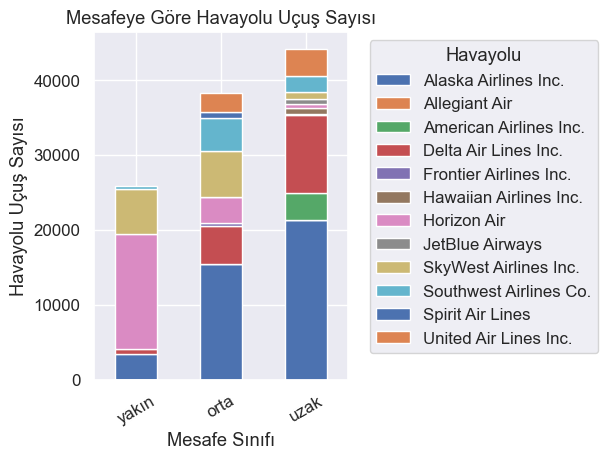

In [56]:
# Bar grafiği çizelim
plt.figure(figsize=(24, 6))

mesafe_havayolu.plot(kind='bar', stacked=True)
plt.xlabel('Mesafe Sınıfı')
plt.ylabel('Havayolu Uçuş Sayısı')
plt.title('Mesafeye Göre Havayolu Uçuş Sayısı')
plt.xticks(rotation=30)
plt.legend(title='Havayolu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Havayolu şirketleri arasında en fazla uçuşu gerçekleştiren firmaları belirleyin

In [57]:
df['havayolu'].value_counts()

havayolu
Alaska Airlines Inc.      40312
Horizon Air               19424
Delta Air Lines Inc.      16113
SkyWest Airlines Inc.     13082
Southwest Airlines Co.     6937
United Air Lines Inc.      6180
American Airlines Inc.     3575
Spirit Air Lines            819
Hawaiian Airlines Inc.      720
JetBlue Airways             637
Frontier Airlines Inc.      442
Allegiant Air                91
Name: count, dtype: int64

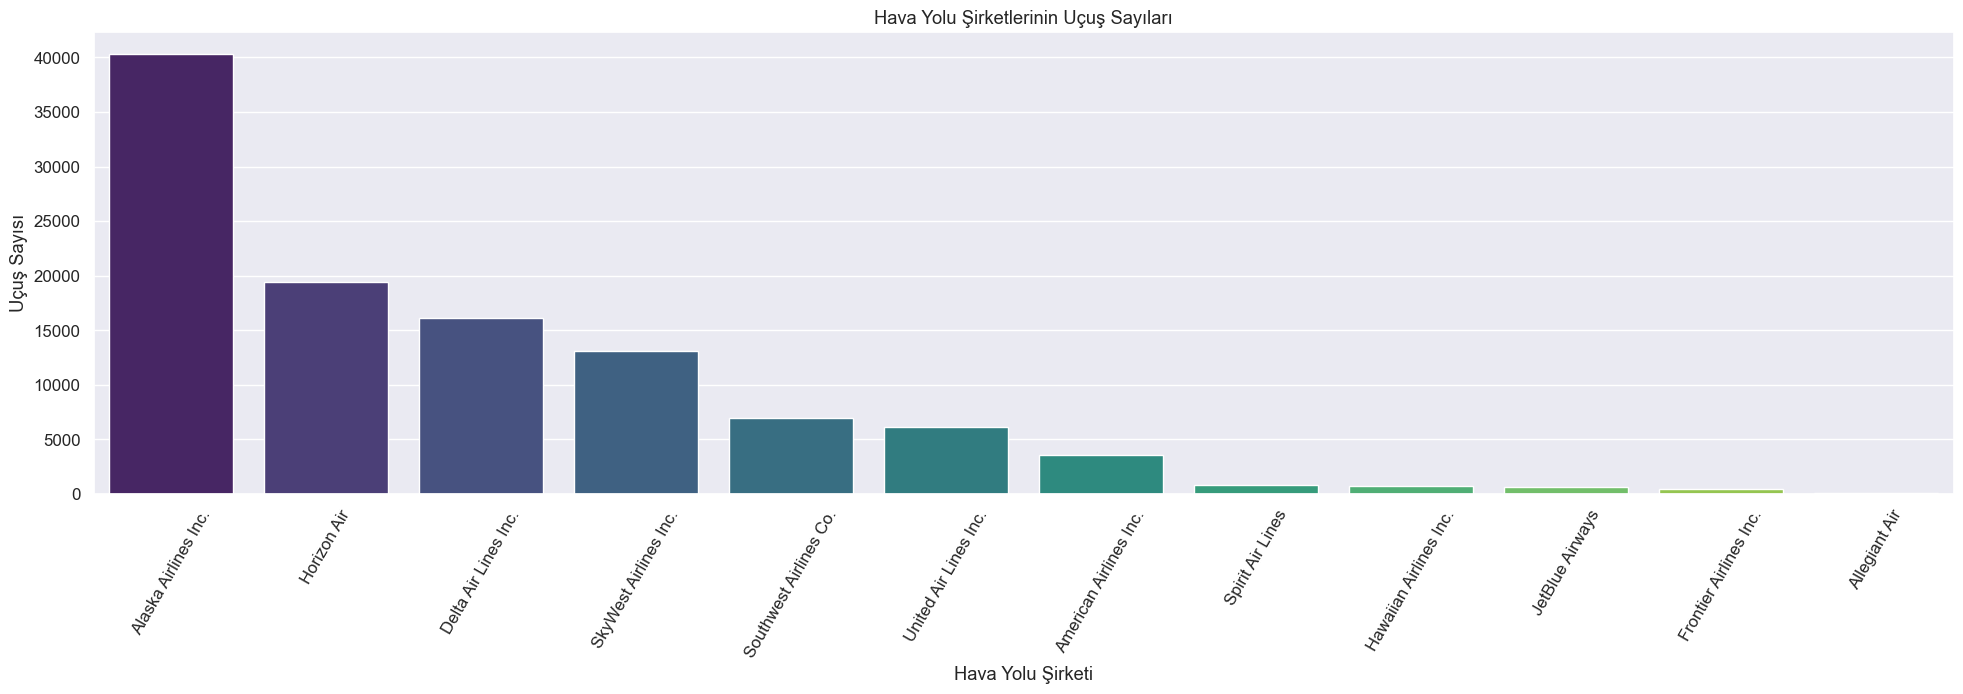

In [58]:
# havayollarının uçuş sayılarını bar grafiği olarak gösterelim.

# Bar grafiği çizelim.
plt.figure(figsize=(24, 6))
sns.barplot(x=df['havayolu'].value_counts().index, y=df['havayolu'].value_counts().values, palette='viridis')
plt.xlabel('Hava Yolu Şirketi')
plt.ylabel('Uçuş Sayısı')
plt.title('Hava Yolu Şirketlerinin Uçuş Sayıları')
plt.xticks(rotation=60)
plt.show()

# 4. Gecikmeleri varsayarak havayolu şirketlerinin performansları kıyaslayınız. 

In [59]:
df_gecikme=df.groupby('havayolu')['kalkış_gecikmesi'].mean().reset_index().sort_values(by='kalkış_gecikmesi', ascending=False)
df_gecikme

,havayolu,kalkış_gecikmesi
7,JetBlue Airways,42.103611
1,Allegiant Air,26.769231
2,American Airlines Inc.,20.180140
4,Frontier Airlines Inc.,14.253394
9,Southwest Airlines Co.,11.331988
10,Spirit Air Lines,10.841270
3,Delta Air Lines Inc.,10.621858
5,Hawaiian Airlines Inc.,8.256944
11,United Air Lines Inc.,7.011165
0,Alaska Airlines Inc.,6.735290


## 5. Havayolu performansının yılın farklı aylarına göre değişip değişmediğini ve en iyi 5 havayolu performansı ile en kötü 5 performansı gösteriniz 

In [60]:
# Her ay için en iyi ve en kötü performans gösteren 5 havayolu
top5_best_per_month = df.groupby(['ay', 'havayolu'])['kalkış_gecikmesi'].mean().reset_index()
top5_best_per_month = top5_best_per_month.sort_values(['ay', 'kalkış_gecikmesi']).groupby('ay').head(5)

top5_worst_per_month = df.groupby(['ay', 'havayolu'])['kalkış_gecikmesi'].mean().reset_index()
top5_worst_per_month = top5_worst_per_month.sort_values(['ay', 'kalkış_gecikmesi'], ascending=False).groupby('ay').head(5)

# Sonuçları gösterme
print("Her ay için en iyi performans gösteren 5 havayolu:")
print(top5_best_per_month)

print("\nHer ay için en kötü performans gösteren 5 havayolu:")
print(top5_worst_per_month)

Her ay için en iyi performans gösteren 5 havayolu:
    ay                havayolu  kalkış_gecikmesi
10   1        Spirit Air Lines          3.412281
5    1  Hawaiian Airlines Inc.          3.728682
0    1    Alaska Airlines Inc.          8.823646
11   1   United Air Lines Inc.          8.959427
9    1  Southwest Airlines Co.          9.189888
20   2   SkyWest Airlines Inc.          2.527401
18   2             Horizon Air          3.908581
12   2    Alaska Airlines Inc.          4.577867
23   2   United Air Lines Inc.          5.127907
15   2    Delta Air Lines Inc.          6.258834
32   3   SkyWest Airlines Inc.          1.941381
25   3           Allegiant Air          2.000000
30   3             Horizon Air          3.568354
35   3   United Air Lines Inc.          3.930348
24   3    Alaska Airlines Inc.          5.175795
44   4   SkyWest Airlines Inc.          5.145125
41   4  Hawaiian Airlines Inc.          5.387931
42   4             Horizon Air          6.655375
47   4   United Ai

In [61]:
# 6 ay için en iyi ve en kötü performans gösteren 5 havayolu
top5_best= df.groupby('havayolu')['kalkış_gecikmesi'].mean().reset_index()
top5_best= top5_best.sort_values('kalkış_gecikmesi').head(5)

top5_worst= df.groupby('havayolu')['kalkış_gecikmesi'].mean().reset_index()
top5_worst= top5_worst.sort_values('kalkış_gecikmesi', ascending=False).head(5)

# Sonuçları gösterme
print("en iyi performans gösteren 5 havayolu:")
print(top5_best)

print("en kötü performans gösteren 5 havayolu:")
print(top5_worst)

en iyi performans gösteren 5 havayolu:
                  havayolu  kalkış_gecikmesi
8    SkyWest Airlines Inc.          4.612292
6              Horizon Air          6.256950
0     Alaska Airlines Inc.          6.735290
11   United Air Lines Inc.          7.011165
5   Hawaiian Airlines Inc.          8.256944
en kötü performans gösteren 5 havayolu:
                 havayolu  kalkış_gecikmesi
7         JetBlue Airways         42.103611
1           Allegiant Air         26.769231
2  American Airlines Inc.         20.180140
4  Frontier Airlines Inc.         14.253394
9  Southwest Airlines Co.         11.331988


## 7.Rotar Süresinin daha yüksek olduğu günün belirli bir saati ve/veya yılın saati var mı? 

In [62]:
#Tarih sütunundan gün bilgisini çekip ortalamalarına bakalım
df_gün_ort=df.groupby(df['tarih'].dt.day_name())['kalkış_gecikmesi'].mean()
df_gün_ort.reset_index()

,tarih,kalkış_gecikmesi
0,Friday,10.264823
1,Monday,8.806513
2,Saturday,7.963684
3,Sunday,10.712246
4,Thursday,7.612842
5,Tuesday,5.076496
6,Wednesday,5.537446


In [63]:
#günleri sıralı bir biçimde alt alta yazdıralım.
gün_sıralaması=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sıralı_gün_ort=df_gün_ort.reindex(gün_sıralaması)
df_sıralı_gün_ort.reset_index()

,tarih,kalkış_gecikmesi
0,Monday,8.806513
1,Tuesday,5.076496
2,Wednesday,5.537446
3,Thursday,7.612842
4,Friday,10.264823
5,Saturday,7.963684
6,Sunday,10.712246


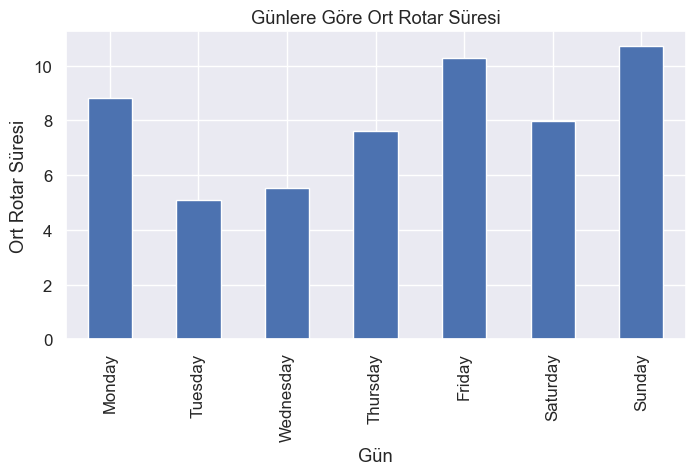

In [64]:
# Bar grafiği ile görselleştirelim.
plt.figure(figsize=(8, 4))
df_sıralı_gün_ort.plot(kind='bar')
plt.xlabel('Gün')
plt.ylabel('Ort Rotar Süresi')
plt.title('Günlere Göre Ort Rotar Süresi')
plt.grid(True)
plt.show()

In [65]:
# Saat ve rötar süresi arasındaki ilişkiyi incelemek için gruplama ve ortalama hesaplayalım.
saate_göre_gecikme = df.groupby('saat')['kalkış_gecikmesi'].mean()
saate_göre_gecikme.reset_index().sort_values(by='kalkış_gecikmesi', ascending=False)

,saat,kalkış_gecikmesi
20,23,13.257545
18,21,12.132017
0,0,11.967617
19,22,11.457535
14,17,10.596125
12,15,10.207950
11,14,10.140122
15,18,9.681837
13,16,9.154979
17,20,9.045913


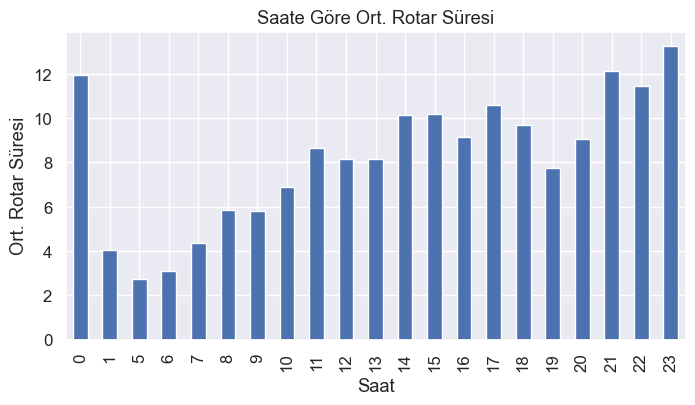

In [66]:
# Bar grafiği ile görselleştirelim.
plt.figure(figsize=(8, 4))
saate_göre_gecikme.plot(kind='bar')
plt.xlabel('Saat')
plt.ylabel('Ort. Rotar Süresi')
plt.title('Saate Göre Ort. Rotar Süresi')
plt.grid(True)
plt.show()

## 8. En yüksek ROTAR süresine sahip güzergahlar hangileri? 

In [67]:
# Rotaları gruplayarak ortalama kalkış gecikmesi süresini hesaplayalım.
rotaya_göre_rötar = df.groupby('rota')['kalkış_gecikmesi'].mean()

#sıralayalım
sıralı_rötaya_göre_rötar=rotaya_göre_rötar.reset_index().sort_values(by='kalkış_gecikmesi',ascending=False)
sıralı_rötaya_göre_rötar

,rota,kalkış_gecikmesi
13,PDX-DSM,35.782609
19,PDX-GRR,35.739130
109,SEA-MIA,29.916667
17,PDX-FLL,28.043478
71,SEA-CLT,27.376682
...,...,...
53,PDX-STS,0.638889
51,PDX-SNA,0.067961
45,PDX-SBP,-0.555556
7,PDX-BZN,-0.714286


In [68]:
# En yüksek rötara sahip 5 rota:
top5_rota = sıralı_rötaya_göre_rötar.head(5)

print("En yüksek rötara sahip 5 rota:")
top5_rota.reset_index()

En yüksek rötara sahip 5 rota:


,index,rota,kalkış_gecikmesi
0,13,PDX-DSM,35.782609
1,19,PDX-GRR,35.739130
2,109,SEA-MIA,29.916667
3,17,PDX-FLL,28.043478
4,71,SEA-CLT,27.376682


## 9. Makine öğrenmesi modeli kurup uçuşların gecikme sürelerini tahmin ediniz.
 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [70]:
# 'object' veri tipine sahip sütun adlarını listeleme
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Object veri tipindeki sütun adları:", object_columns)

Object veri tipindeki sütun adları: ['kalkış_zamanı', 'pln_kalkış_zamanı', 'varış_zamanı', 'pln_varış_zamanı', 'taşıyıcı', 'kuyruk_no', 'kalkış_yeri', 'varış_yeri', 'havayolu', 'rota']


In [71]:
### Bazı sütunları çıkartalım
df = df.drop(columns=['kalkış_zamanı', 'pln_kalkış_zamanı', 'varış_zamanı', 'pln_varış_zamanı','tarih','kuyruk_no','uçuş','taşıyıcı','rota','sıcaklık', 'çimlenme_noktası', 'nem', 'rüzgar_yönü',
       'rüzgar_hızı', 'rüzgar_şiddeti', 'yağış', 'basınç','varış_yeri'])

In [72]:
# Özellikleri ve hedef değişkeni belirleyelim
X = df.drop(columns=['kalkış_gecikmesi'])
y = df['kalkış_gecikmesi']

In [73]:
# Kategorik değişkenleri dummies değişkenlere dönüştürelim
X = pd.get_dummies(X)

In [74]:
# NaN değerleri kontrol edelim
print("NaN değerleri içeren sütunlar:")
print(X.isna().sum()[X.isna().sum() > 0])
# NaN değerlerini dolduralım veya temizleyelim
X.fillna(-1, inplace=True)
y.fillna(y.mean(), inplace=True)

NaN değerleri içeren sütunlar:
Series([], dtype: int64)


In [75]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Modeli oluşturalım ve eğitelim (Linear Regression kullanalım)
model = LinearRegression()
model.fit(X_train, y_train)
# Tahminler yapalım
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# Modeli değerlendirelim
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Eğitim Verisi Değerlendirmesi:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")
print("\nTest Verisi Değerlendirmesi:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Eğitim Verisi Değerlendirmesi:
MAE: 6.83
MSE: 93.18
R-squared: 0.95

Test Verisi Değerlendirmesi:
MAE: 6.83
MSE: 94.79
R-squared: 0.94


In [77]:
linear=LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.9382946907673345

In [78]:
linear.score(X_train,y_train)

0.9478768289918152

In [79]:
from sklearn.linear_model import LinearRegression

# X bağımsız değişkeni ve y bağımlı değişkeni hazır olduğunu varsayalım
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [85]:
# Örnek bir X_new DataFrame'i oluşturalım (bu sadece bir örnek)
X_new = pd.DataFrame({
    'yıl':[2022], 
    'ay':[6], 
    'gün':[10], 
    'varış_gecikmesi':[-10.0],
    'hava_sür':[30.0], 
    'mesafe':[129], 
    'saat':[23], 
    'dakika':[0],
    'görüş':[10.00 ],
    'kalkış_yeri_PDX':[0],
    'kalkış_yeri_SEA':[1], 
    'havayolu_Alaska Airlines Inc.':[0],
    'havayolu_Allegiant Air':[1], 
    'havayolu_American Airlines Inc.':[0], 
    'havayolu_Delta Air Lines Inc.':[0], 
    'havayolu_Frontier Airlines Inc.':[0], 
    'havayolu_Hawaiian Airlines Inc.':[0], 
    'havayolu_Horizon Air':[0], 
    'havayolu_JetBlue Airways':[0], 
    'havayolu_SkyWest Airlines Inc.':[0], 
    'havayolu_Southwest Airlines Co.':[0], 
    'havayolu_Spirit Air Lines':[0], 
    'havayolu_United Air Lines Inc.':[0], 
    'gecikme_seviyeleri_1.seviye':[1],
    'gecikme_seviyeleri_2.seviye':[0], 
    'gecikme_seviyeleri_3.seviye':[0], 
    'gecikme_seviyeleri_4.seviye':[0], 
    'gecikme_seviyeleri_5.seviye':[0], 
    'gecikme_seviyeleri_iptal':[0], 
    'mesafe_kategorisi_yakın':[1],
    'mesafe_kategorisi_orta':[0], 
    'mesafe_kategorisi_uzak':[0]
    
})

# Modelin predict metodunu kullanarak tahmin yapın
y_pred = model.predict(X_new)

In [86]:
# Modelin predict metodunu kullanarak tahmin yapın
y_pred = model.predict(X_new)

print("Tahmin edilen kalkış gecikmesi:", y_pred)

Tahmin edilen kalkış gecikmesi: [-7.23881018]
